,archivo,procesos,tiempo,costo,speedup,eficiencia
0,11nodos.txt,1,0.053963,133,1.000000,1.000000
1,11nodos.txt,2,0.031530,133,1.711484,0.855742
2,11nodos.txt,4,0.014668,133,3.678993,0.919748
3,11nodos.txt,6,0.020230,133,2.667479,0.444580
4,11nodos.txt,8,0.012505,133,4.315425,0.539428
5,11nodos.txt,10,0.007614,133,7.087715,0.708772
6,11nodos.txt,12,0.007524,133,7.172043,0.597670
7,12nodos.txt,1,0.045284,1733,1.000000,1.000000
8,12nodos.txt,2,0.026937,1733,1.681116,0.840558
9,12nodos.txt,4,0.018487,1733,2.449487,0.612372


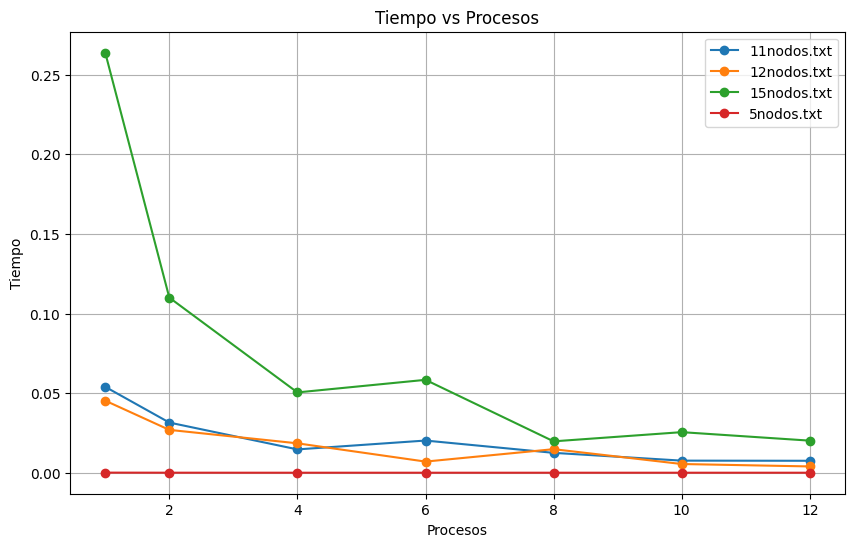

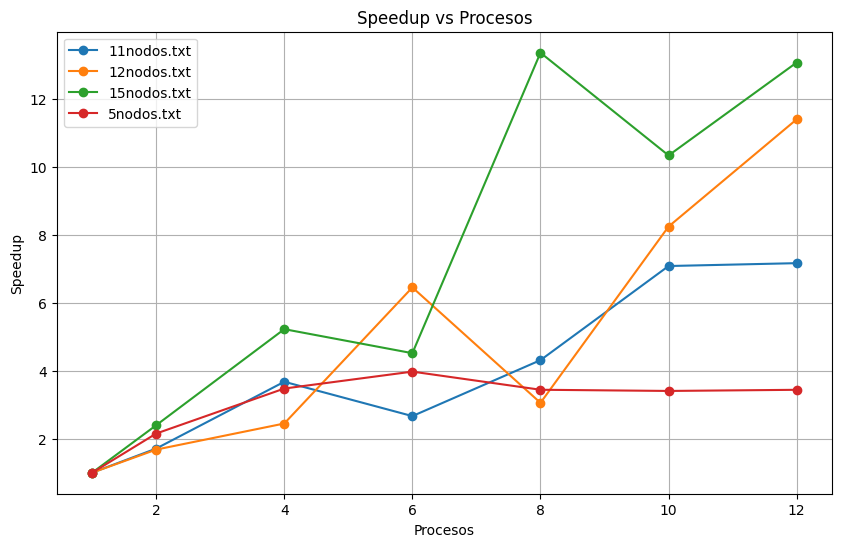

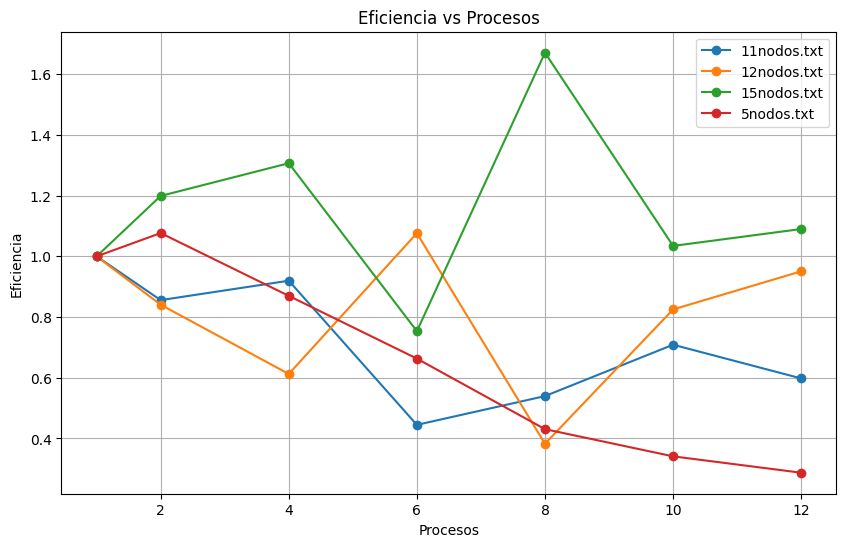

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo
df = pd.read_csv('output.csv')

# Ordenar por archivo y procesos
df = df.sort_values(by=['archivo', 'procesos'])

# Calcular Speedup y Eficiencia agrupando por archivo
df['speedup'] = df.groupby('archivo')['tiempo'].transform(lambda x: x.iloc[0] / x)
df['eficiencia'] = df['speedup'] / df['procesos']

# Ver datos
display(df)

# Función para graficar agrupado por archivo
def graficar_metricas(df, metrica):
    plt.figure(figsize=(10, 6))
    for archivo, grupo in df.groupby('archivo'):
        plt.plot(grupo['procesos'], grupo[metrica], marker='o', label=archivo)

    plt.title(f'{metrica.capitalize()} vs Procesos')
    plt.xlabel('Procesos')
    plt.ylabel(metrica.capitalize())
    plt.grid(True)
    plt.legend()
    plt.show()

# Graficar las 3 métricas
graficar_metricas(df, 'tiempo')
graficar_metricas(df, 'speedup')
graficar_metricas(df, 'eficiencia')
